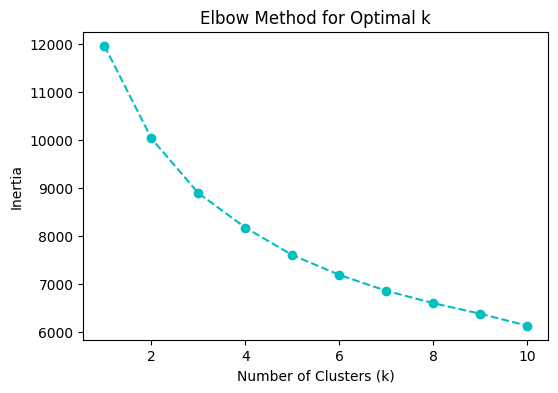

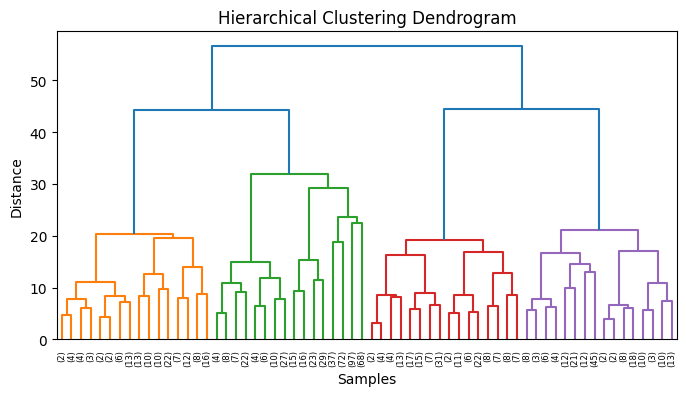

K-Means ARI: 0.110
Hierarchical ARI: 0.074
K-Means Silhouette Score: 0.172
Hierarchical Silhouette Score: 0.166


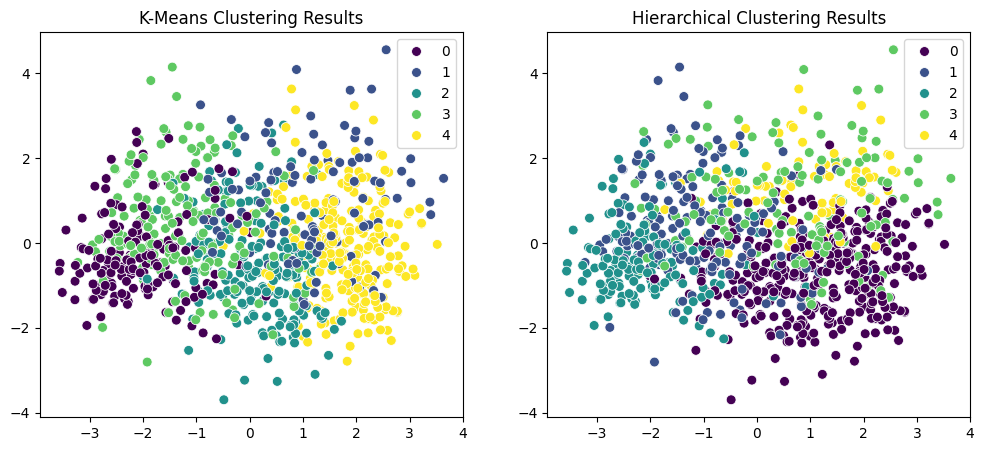

Unsupervised learning completed!


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import adjusted_rand_score, silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load data
df_encoded = pd.read_csv('data/heart_disease.csv')
X = df_encoded.drop("target", axis=1)
y = df_encoded["target"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
#Unsupervised Learning : Clustering
# K-Means (with Elbow Method)
inertia = []      
K_range = range(1, 11)  
for k in K_range:
     km = KMeans(n_clusters=k, random_state=42, n_init=10)
     km.fit(X_scaled) 
     inertia.append(km.inertia_)  

 # Plot elbow curve to find best k
plt.figure(figsize=(6,4))
plt.plot(K_range, inertia, marker='o', linestyle='--', color='c')       
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()   

kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)   

# Hierarchical Clustering
# Create a dendrogram (tree diagram showing merging of clusters)
plt.figure(figsize=(8,4))
linkage_matrix = linkage(X_scaled, method='ward')   # Ward’s method (minimizes variance)
dendrogram(linkage_matrix, truncate_mode="level", p=5,color_threshold=None)  
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()


# Apply Agglomerative Clustering with 2 clusters
hc = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
hc_labels = hc.fit_predict(X_scaled)   

# Compare Clusters with True Labels
# Adjusted Rand Index (compares clustering with actual labels)
print("K-Means ARI:", f"{adjusted_rand_score(y, kmeans_labels):.3f}")
print("Hierarchical ARI:", f"{adjusted_rand_score(y, hc_labels):.3f}")

# Silhouette Score (higher is better, range -1 to 1)
print("K-Means Silhouette Score:", f"{silhouette_score(X_scaled, kmeans_labels):.3f}")
print("Hierarchical Silhouette Score:", f"{silhouette_score(X_scaled, hc_labels):.3f}")


#  Visualization
pca = PCA(n_components=2)               # Reduce dataset to 2 dimensions
X_pca = pca.fit_transform(X_scaled)     # Transform scaled data into 2D space

plt.figure(figsize=(12,5))

# Plot K-Means clusters
plt.subplot(1,2,1)                   
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=kmeans_labels, 
                palette="viridis", s=50)
plt.title("K-Means Clustering Results")

# Plot Hierarchical clusters
plt.subplot(1,2,2)                      # Second subplot
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=hc_labels, 
                palette="viridis", s=50)
plt.title("Hierarchical Clustering Results")

plt.show()
print("Unsupervised learning completed!")